<a href="https://colab.research.google.com/github/KashProgramming/djs-compute-daml-tasks/blob/main/DAML_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAML Tasks/Task1/listings_data.csv")
df.head()

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            48895 non-null  int64  
 1   listing_name          48879 non-null  object 
 2   host_id               48895 non-null  int64  
 3   host_name             48874 non-null  object 
 4   borough               48895 non-null  object 
 5   area                  48895 non-null  object 
 6   latitude              48895 non-null  float64
 7   longitude             48895 non-null  float64
 8   room_type             48895 non-null  object 
 9   price (in dollars)    48895 non-null  int64  
 10  minimum_stay          48895 non-null  int64  
 11  no_of_reviews         48895 non-null  int64  
 12  last_review_date      38843 non-null  object 
 13  reviews_per_month     38843 non-null  float64
 14  host_listing_count    48895 non-null  int64  
 15  booking_availabilit

In [ ]:
df.describe()

,listing_id,host_id,latitude,longitude,price (in dollars),minimum_stay,no_of_reviews,reviews_per_month,host_listing_count,booking_availability
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.shape

(48895, 16)

In [ ]:
# Dropping any duplicates present in the data
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(48895, 16)

In [ ]:
# Finding out percentage of null values in each column
def get_null_percentages(df,columns):
    result = {}
    for col in columns:
      null_count=df[col].isnull().sum()
      total_count=len(df)
      null_percentage=(null_count/total_count)*100
      result[col]=round(null_percentage,2)
    return result
null_percentages=get_null_percentages(df,df.columns)
for column, percentage in null_percentages.items():
  print(f"{column}: {percentage}%")

listing_id: 0.0%
listing_name: 0.03%
host_id: 0.0%
host_name: 0.04%
borough: 0.0%
area: 0.0%
latitude: 0.0%
longitude: 0.0%
room_type: 0.0%
price (in dollars): 0.0%
minimum_stay: 0.0%
no_of_reviews: 0.0%
last_review_date: 20.56%
reviews_per_month: 20.56%
host_listing_count: 0.0%
booking_availability: 0.0%


In [ ]:
# Dropping rows for columns with very few null values
df.dropna(subset=["listing_name","host_name"],inplace=True)
df.shape

(48858, 16)

In [ ]:
# Replacing null values with 0 in the reviews_per_month column as no reviews were made for that listing
df["reviews_per_month"].fillna(0,inplace=True)

In [ ]:
null_percentages=get_null_percentages(df,df.columns)
for column, percentage in null_percentages.items():
  print(f"{column}: {percentage}%")

listing_id: 0.0%
listing_name: 0.0%
host_id: 0.0%
host_name: 0.0%
borough: 0.0%
area: 0.0%
latitude: 0.0%
longitude: 0.0%
room_type: 0.0%
price (in dollars): 0.0%
minimum_stay: 0.0%
no_of_reviews: 0.0%
last_review_date: 20.54%
reviews_per_month: 0.0%
host_listing_count: 0.0%
booking_availability: 0.0%


In [ ]:
# Filling null values with a default value 01-01-1970 which means the listing has no reviews and therefore no value for last_review_date
# Converting the data type to datetime
df["last_review_date"].fillna("01-01-1970",inplace=True)
df["last_review_date"]=pd.to_datetime(df["last_review_date"],dayfirst=True)

In [ ]:
null_percentages=get_null_percentages(df,df.columns)
for column, percentage in null_percentages.items():
  print(f"{column}: {percentage}%")

listing_id: 0.0%
listing_name: 0.0%
host_id: 0.0%
host_name: 0.0%
borough: 0.0%
area: 0.0%
latitude: 0.0%
longitude: 0.0%
room_type: 0.0%
price (in dollars): 0.0%
minimum_stay: 0.0%
no_of_reviews: 0.0%
last_review_date: 0.0%
reviews_per_month: 0.0%
host_listing_count: 0.0%
booking_availability: 0.0%


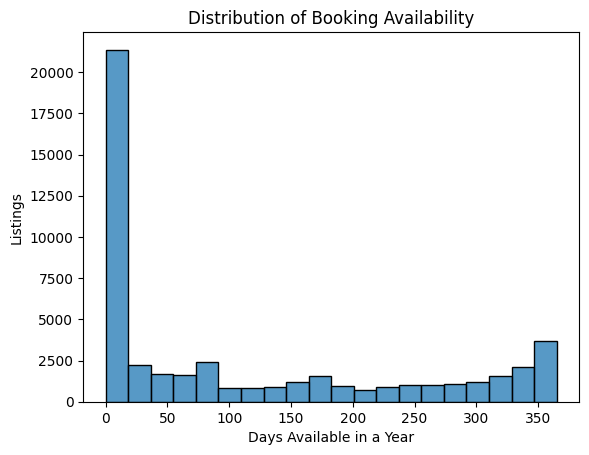

In [ ]:
# Creating a histogram to show availabilty distribution of listings. More than 20000 listings are available for less than 50 days.
# This means most listings are booked throughout the year. This can be a good marker for the brand's success.
sns.histplot(df["booking_availability"],bins=20)
plt.title("Distribution of Booking Availability")
plt.xlabel("Days Available in a Year")
plt.ylabel("Listings")
plt.show()

In [ ]:
df_year=pd.to_datetime(df["last_review_date"]).dt.year.to_frame()
df_year.rename(columns={"last_review_date":"Year"}, inplace=True)
df_year

,Year
0,2018
1,2019
2,1970
3,2019
4,2018
...,...
48890,1970
48891,1970
48892,1970
48893,1970


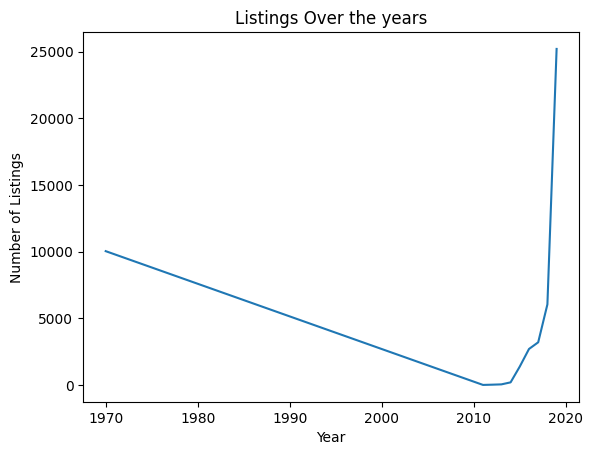

In [ ]:
# Creating a line chart to see the trend of the number of listings scored over the years.
# The 1970 values indicate no reviews for those listings.
# The no.of listings steeply increase between 2015 and 2020.
# If any particular marketing strategy was used during this period, it was very successful and should be analysed for future use.
listings=df_year.groupby("Year").size()
sns.lineplot(x=listings.index,y=listings.values)
plt.title("Listings Over the years")
plt.xlabel("Year")
plt.ylabel("Number of Listings")
plt.show()

Text(0.5, 0, 'Borough')

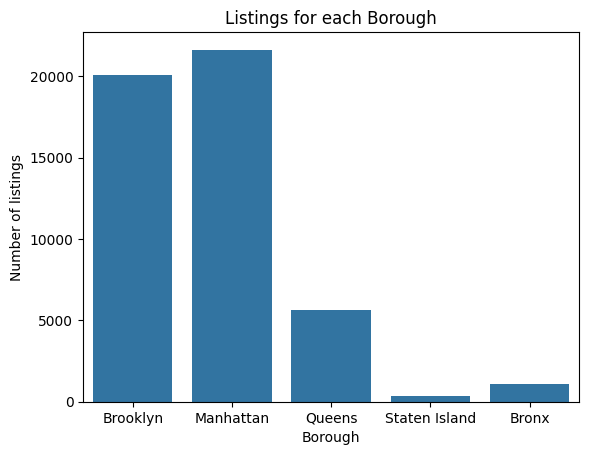

In [ ]:
# Plotting a countplot of number of listings for each borough.
# Inference: Manhattan has more than 20000 listings, Brooklyn nearly 20000.
# So the company should focus on promoting their brand more in these places, as the demand is high.
# The prices for listings in Manhattan can also be increased to increase profitability.
sns.countplot(x=df["borough"])
plt.title("Listings for each Borough")
plt.ylabel("Number of listings")
plt.xlabel("Borough")

Text(0, 0.5, 'Room Type')

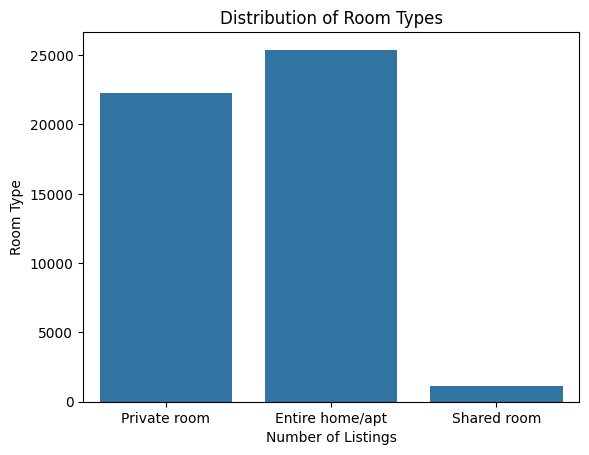

In [ ]:
# Creating a countplot for the room type.
# Inference: More than 25000 listings were for the 'Entire home/apt' category, meaning most customers book an entire home.
# So, the brand could increase prices for this category, as it is in demand and so will be more profitable for them.
sns.countplot(x=df["room_type"])
plt.title("Distribution of Room Types")
plt.xlabel("Number of Listings")
plt.ylabel("Room Type")

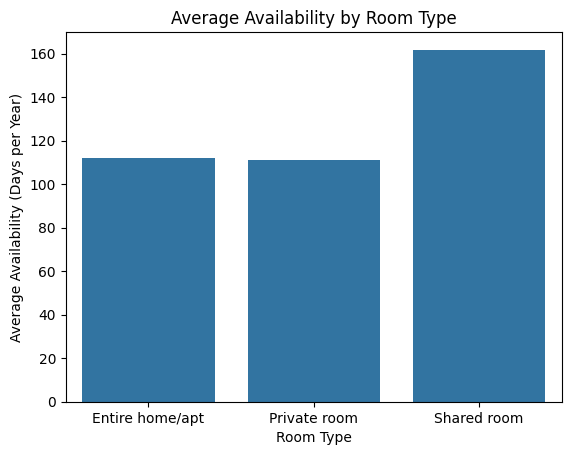

In [ ]:
# Creating a bar chart to find the average availability of each room type
# Inference: Since shared room has the most availability, it's demand is least.
# To fix this, the brand could lower the prices to ensure more bookings or shift shared room listings to popular boroughs like Manhattan or Brooklyn.
room_availability=df.groupby("room_type")["booking_availability"].mean().reset_index()
sns.barplot(x=room_availability["room_type"],y=room_availability["booking_availability"])
plt.title("Average Availability by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Availability (Days per Year)")
plt.show()

Text(0, 0.5, 'Frequency')

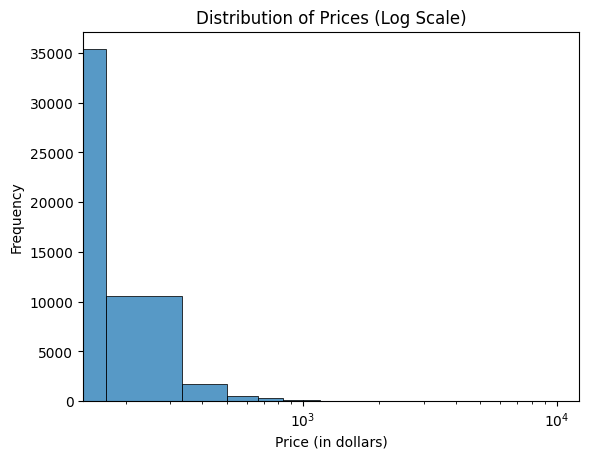

In [ ]:
# Creating a histogram to understand the distribution of prices.
# Inference: the data for prices is highly skewed, showing there are very listings which have too high prices, but most have low prices
sns.histplot(df["price (in dollars)"],bins=60)
plt.xscale("log")
plt.title("Distribution of Prices (Log Scale)")
plt.xlabel("Price (in dollars)")
plt.ylabel("Frequency")

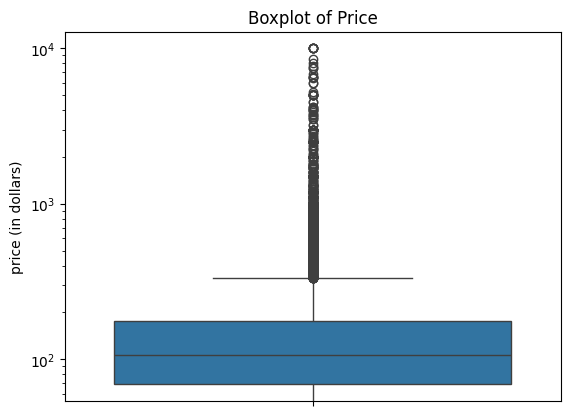

In [ ]:
# Creating a box plot to check the outliers present in the data
# The Price column has too many values that are higher than 3rdQuartile+1.5IQR, showing that some listings are actually that expensive, while most aren't
sns.boxplot(y=df["price (in dollars)"])
plt.yscale("log")
plt.title("Boxplot of Price")
plt.show()

In [ ]:
# Finding outliers by using the IQR method to find upper and lower limits of the prices
# Creating a dataframe for all the outliers, i.e. values greater than upper limit and smaller than lower limit
q1=df["price (in dollars)"].quantile(0.25)
q3=df["price (in dollars)"].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
outliers=df[(df["price (in dollars)"]<lower_limit) | (df["price (in dollars)"]>upper_limit)]

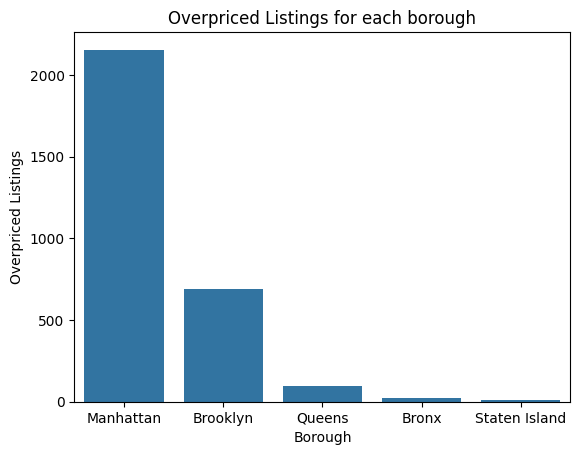

In [ ]:
# Creating a barplot to show the number of listings with outlier prices for each borough
# Manhattan has more than 2000 listings whose prices are higher than 75% of the prices.
# Inference: Manhattan is the most costly borough and can therefore be marketed as luxury
outlier_borough_counts=outliers['borough'].value_counts()
sns.barplot(x=outlier_borough_counts.index,y=outlier_borough_counts.values)
plt.title("Overpriced Listings for each borough")
plt.xlabel("Borough")
plt.ylabel("Overpriced Listings")
plt.show()

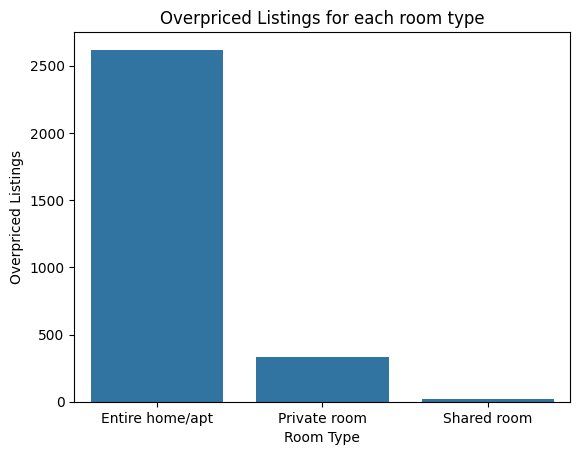

In [ ]:
# Creating a barplot to show the number of listings with outlier prices for each type of room
# Entire home/apt has more than 2500 listings whose prices are higher than 75% of the prices.
# Inference: Shared rooms are the least expensive, so can be marketed as affordable for short stays
outlier_room_type_counts=outliers['room_type'].value_counts()
sns.barplot(x=outlier_room_type_counts.index,y=outlier_room_type_counts.values)
plt.title("Overpriced Listings for each room type")
plt.xlabel("Room Type")
plt.ylabel("Overpriced Listings")
plt.show()

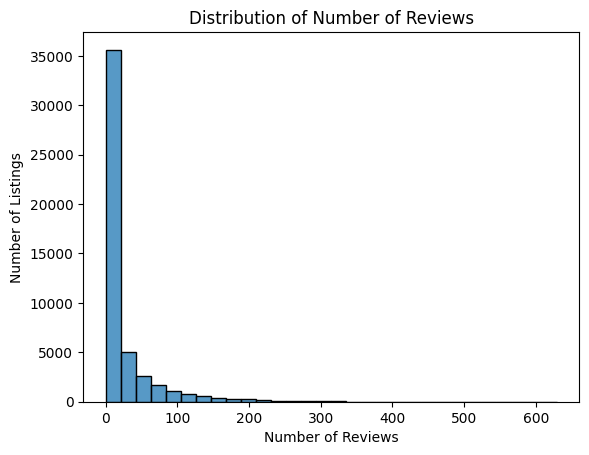

In [ ]:
# Creating a histogram to show distribution of number of reviews for listings
# Inference: More than 40000 listings have less than a 100 reviews, which could be perceived as lack of sufficient customer satisfaction
# The brand should encourage customers to add more reviews, positive or negative
sns.histplot(df["no_of_reviews"], bins=30)
plt.title('Distribution of Number of Reviews')
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Listings")
plt.show()

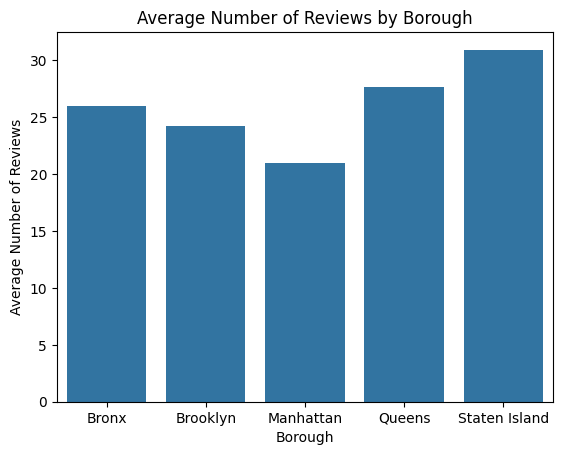

In [ ]:
# Creating a barplot for average number of reviews for each borough
# Inference: Staten Island has an average of 30 reviews. Customer engagement is the most with this borough even though it doesn't have the most listings
avg_reviews_by_borough=df.groupby("borough")["no_of_reviews"].mean().reset_index()
sns.barplot(x=avg_reviews_by_borough["borough"],y=avg_reviews_by_borough["no_of_reviews"])
plt.title("Average Number of Reviews by Borough")
plt.xlabel("Borough")
plt.ylabel("Average Number of Reviews")
plt.show()